In [27]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
carvana = pd.read_csv('carvana.csv')

# dataset: https://www.kaggle.com/datasets/ravishah1/carvana-predict-car-prices

In [31]:
carvana.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,2017,68992,22990


In [33]:
# Check data types to make sure numbers are int's or float and not non-numeric

print(carvana.dtypes)

Name     object
Year      int64
Miles     int64
Price     int64
dtype: object


In [41]:
# get the correlation data for the Weight column

# I have to drop all non-numerical columns in order for .corr to work.
# I dropped 'Name' column

# First, I created a duplicate dataframe so that i still have the original data/columns
# drop column 'Name'
carvana_corr = carvana.drop(columns=['Name'])

# Cleaning the data --------------------
# had to clean the data using Excel as the years contained values with 5 or more digits. I removed the extra digits.
# I used =LEFT(cell_reference, 4) function in Excel to keep only the left most digits as the year.
# After cleaning the data, an examination showed all years fell withing 2009-2023

# perform correlation on new dataframe without 'Species'
carvana_corr.corr()[['Year']].sort_values('Year', ascending=False)


,Year
Year,1.000000
Price,0.491751
Miles,-0.480044


<Axes: >

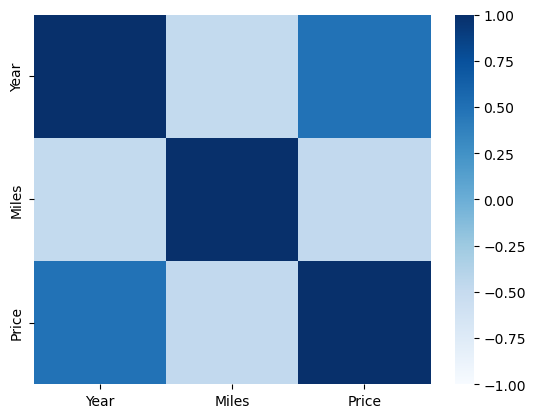

In [71]:
# create a heatmap for the correlation data

sns.heatmap(data=carvana_corr.corr(), cmap='Blues',
 vmin=-1.0, vmax=1.0)

In [73]:
# Interesting.  Looks like there may not be a correlation between year, mileage and price.  Guess the car dealers can charge what they want.
# But let's forge ahead with this data for the sake of it.

# There are several types of car models (Chevy, BMW, and various submodels ...).
# I own a Jeep Renegade so let's filer to only include that Make and Model.

# filter, but i use the original dataframe containing 'Name'.
# new datafram for 'Jeep Renegade' will be called 'jr ' for short.
jr = carvana[carvana['Name'] == ' Jeep Renegade']

# i make a second dataframe without 'Name', will be used for correlation ... can't include 'Name' as it's non-numeric.
jr_corr = jr.drop(columns=['Name'])

jr_corr.head()

,Year,Miles,Price
3,2019,35372,21590
123,2019,35372,21590
169,2015,93583,16590
261,2015,93583,16590
314,2016,60940,17590


In [75]:
# split the training and test data

x_train, x_test, y_train, y_test = train_test_split(
    jr_corr[['Year']], jr_corr[['Price']],
    test_size=0.20, random_state=20)

In [77]:
# create the model and fit the training data

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [79]:
# score the testing data

model.score(x_test,y_test)

0.3712733933965464

In [81]:
# not good.  That's low.

# make the predictions

y_predicted = model.predict(x_test)
predicted = pd.DataFrame(y_predicted, columns=['predicted_Price'])

In [83]:
# join the predicted data with the original data

combined = x_test.reset_index(drop=True).join([y_test.reset_index(drop=True), predicted])
combined.head()

,Year,Price,predicted_Price
0,2018,18590,20479.859725
1,2018,22990,20479.859725
2,2019,21990,21464.074336
3,2017,16990,19495.645114
4,2017,19590,19495.645114


In [87]:
# calculate the residuals and store them in a column

combined['residual'] = combined.Price- combined.predicted_Price
combined.head()

,Year,Price,predicted_Price,residual
0,2018,18590,20479.859725,-1889.859725
1,2018,22990,20479.859725,2510.140275
2,2019,21990,21464.074336,525.925664
3,2017,16990,19495.645114,-2505.645114
4,2017,19590,19495.645114,94.354886


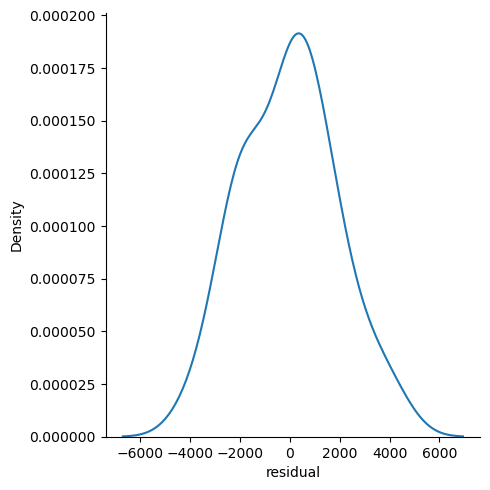

In [89]:
# create a KDE plot for the residuals

sns.displot(data=combined, x='residual', kind='kde')

In [101]:
melted = pd.melt(combined, id_vars=['Year'], value_vars=['Price','predicted_Price'],
                 var_name='new_price', value_name='Price_value')

melted.head()

,Year,new_price,Price_value
0,2018,Price,18590.0
1,2018,Price,22990.0
2,2019,Price,21990.0
3,2017,Price,16990.0
4,2017,Price,19590.0


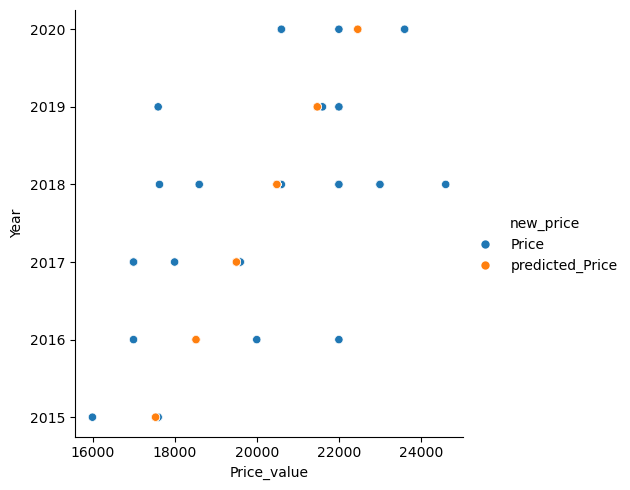

In [107]:
sns.relplot(data=melted, x='Price_value', y='Year', hue='new_price')

In [ ]:
# Conclusion:
# Null-Hypothesis is correct: there is no correlation between a car's (particularly a Jeep Renegade) year and it's value.  Maybe a slight correlation ...
# using this as a predictive model and set won't work.
# Used car dealers can rejoice, they will be able to charge what they want for Renegades.